# Példa 4.3-4.5
Határozzuk meg a különböző feszültségi állapotok esetén a főfeszültségeket és a feszültségi főirányokhoz tartozó egységvektorokat.

# Megoldás

A megoldás során szükségünk lesz a `sympy` modulra. A számolások során a feszültségi állapotot jellemző tenzort egy  $3\times 3$-as mátrixként adhatjuk meg.

In [1]:
import sympy as sp
sp.init_printing()
# A σ indexei a feladat sorszámait jelölik!

σ_43 = sp.Matrix([[-20,0,30],[0,15,0],[30,0,40]])
σ_44 = sp.Matrix([[-5,-10,0],[-10,-20,0],[0,0,-30]])
σ_45 = sp.Matrix([[0,-10,0],[-10,0,0],[0,0,10]])

## Sajátérték, sajátvektor számítás

A feszültségi állapotot jellemző főfeszültségek és a hozzájuk tartozó főirányok megfeleltethetőek a feszültségi állapotot jellemző tenzor sajátértékeivel és sajátvektoraival.

A `sympy` segítségével a sajátértékeket és sajátvektorokat egy utasítással (`.eigenvects()`) megkaphatjuk. Mivel a `sympy` speciális esetekre is fel van készítve, ezért a megoldást erősen "becsomagolva" kapjuk meg.

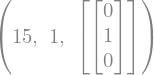

In [2]:
eig_system= σ_43.eigenvects()

# Az első sajátérték/multiplicitás/sajátvektor adatok
eig_system[0]

Eredményül a mátrixhoz tartozó sajátérték/sajátvektor párokat kapjuk. Az `.eigenvects()` egy listát ad vissza. Ennek a listának az elemei olyan `tuple`-ök (a mi szempontunkból a `tuple` gyakorlatilag egy lista), melyek:

- A sajátérték
- A sajátérték multiplicitása (pl: ha két sajátérték egybeesik, akkor annak a multiplicitása 2 lesz)
- A sajátértékhez tartozó sajátvektor(ok) listája melynek elemszáma a az adott sajátérték multiplicitása

Tartsuk észben, hogy egy $3\times3$-as mátrix esetén ha egy sajátérték multiplicitása nagyobb mint egy, akkor az `sp.eigenvects` nem 3 elemű listát ad eredményül!  
Ha csak egy mátrixot kell kiértékeljünk, akkor a fent említett mennyiségek 'kézzel' is kiolvashatóak.

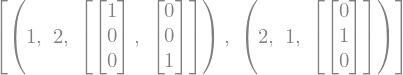

In [3]:
# Példa:
display(sp.Matrix([[1,0,0],[0,2,0],[0,0,1]]).eigenvects()) # Így néz ki, ha többszörösek a sajátértékek

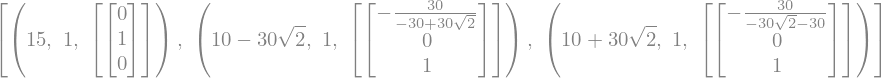

In [4]:
σ_43_sajat = σ_43.eigenvects()
display(σ_43_sajat) # Ilyen, ha egyszeresek

Az `.eigenvects()` függvény nem feltétlenül sorrendben adja vissza a sajátértékeket, ezért rendeznünk kell őket. Célszerű a sajátértékek alapján csökkenő sorrendbe tenni a fenti eredményt. Ezt a következő paranccsal tudjuk megtenni: `σ_43_sajat.sort(key = lambda x : x[0], reverse=True)`.

Rövid magyarázat:

- `lista.sort()`: a listát helyben rendezi, azaz a rendezetlen listát felülírja a rendezett listával,
- `key` =: ami alapján rendez, egyszerű számoknál, stringeknél erre nincs szükség (a mi kódunk is lefut key nélkül, de nem tudjuk, hogy mi alapján rendezi az elemeket, így biztonságosabb megadni a key-t),
- `lambda x : x[0]`: egy úgynevezett `lambda` függvény, ami a bemenő x-nek az első elemét adja vissza, azaz az első elem alapján fogunk rendezni,
- `reverse = True`: növekvő helyett csökkenő sorrendbe teszi az eredményt.



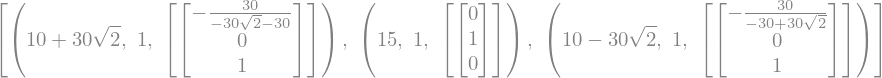

In [5]:
σ_43_sajat.sort(key = lambda x : x[0], reverse=True)
display(σ_43_sajat)

## Automatizálás
Tegyük fel, hogy a lustaságunk által vezérelve nem szeretnénk minden mátrix eredményét kézzel kiolvasni/kiiratni a listákból. Írjunk egy függvényt ami automatizálja ezt a feladatot!

In [6]:
def print_eigensystem(matrix):
    # Legyen a függvény bemenete a vizsgálandó mátrix
    eig_system= matrix.eigenvects()
    
    # Az eredményt a program nem rendezi alapból a sajátértékek nagysága szerint, így azt nekünk kell megtenni
    # A rendezést a 'tuple'-ök első elemei szerint végezzük
    # Utánanézési lehetőség: lambda függvények, sorted() függvény 
    eig_system.sort(key=lambda x: x[0], reverse=True)
    
    # Végig iterálva az 'eig_system' elemein, kiiratjuk a főfeszültségeket és főirányokat
    n = 1
    for elem in eig_system:
        # Ha egy főfeszültség többszörös multiplicitású, akkor többször kell kiírni!
        for i in range(elem[1]): # Az 'elem[1]' értéke a multiplicitást mutatja meg.
                                 # 'range(elem[1])' : csinál egy 'range' objektumot, amin a 'for' ciklus végig
                                 # tud futni. Pontosan annyiszor fut le így a ciklus, amekkora számot adunk a
                                 # 'range' függvény argumentumaként, jelen esetben ez 'elem[1]', azaz a multiplicitás
            sajatertek = elem[0].evalf(5)
            # Normáljuk a sajátvektorokat, hogy egység hosszúságúak legyenek
            sajatvektor = (elem[2][i].normalized()).evalf(5) # '.normalize()': a vektort 1 hosszúságúra normálja
            # Az 'n' változóval sorszámozzuk az egyes értékeket
            print(str(n)+'. Főfeszültség: '+str(sajatertek.evalf(5))+' MPa')
            print(str(n)+'. Főirány: ')
            display(sajatvektor)
            n += 1 # sorszám léptetése

A függvényünket használva a feladatok megoldásai:

1. Főfeszültség: 52.426 MPa
1. Főirány: 


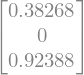

2. Főfeszültség: 15.000 MPa
2. Főirány: 


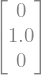

3. Főfeszültség: -32.426 MPa
3. Főirány: 


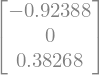

In [7]:
print_eigensystem(σ_43)

1. Főfeszültség: 0 MPa
1. Főirány: 


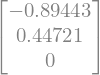

2. Főfeszültség: -25.000 MPa
2. Főirány: 


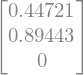

3. Főfeszültség: -30.000 MPa
3. Főirány: 


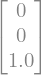

In [8]:
print_eigensystem(σ_44)

1. Főfeszültség: 10.000 MPa
1. Főirány: 


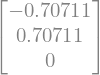

2. Főfeszültség: 10.000 MPa
2. Főirány: 


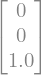

3. Főfeszültség: -10.000 MPa
3. Főirány: 


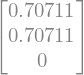

In [9]:
print_eigensystem(σ_45)